In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1 🖥 DecisionTreeClassifier

In [16]:
iris = load_iris()

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], # arrays will be stacked along their last axis
                     columns= iris['feature_names'] + ['target'])

#drop specific columns
data.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)

data.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


In [17]:
y.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [3]:
#Define X and y
X = data.drop(columns=['target'])
y = data['target']

We have three classes on the Iris dataset:

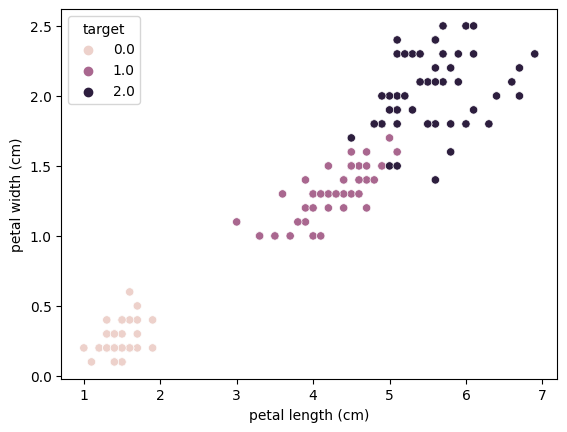

In [20]:
sns.scatterplot(x=X['petal length (cm)'], y=X['petal width (cm)'], hue=y);

In [4]:
# Instantiate and train model
from sklearn.tree import DecisionTreeClassifier

# max_depth -> The maximum depth of the tree
# random_state -> Controls the randomness of the estimator. 
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)

tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=2)

If you wanna use `graphviz`, make sure to `pip install` it and add it to your variables PATH.<br>
`!pip install graphviz`<br>
`C:\Program Files (x86)\Graphviz2.38\bin` -> user path<br>
`C:\Program Files (x86)\Graphviz2.38\bin\dot.exe` -> system path

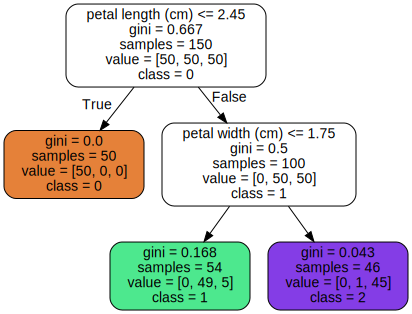

In [6]:
import graphviz

# Export model graph
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="iris_tree.dot", 
                feature_names=data.drop(columns=['target']).columns,
                class_names=['0','1','2'], 
                rounded=True, filled=True)

# Import model graph
with open("iris_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

# Predicting

All we do is we take a new point `X_new = [4(length), 1(width)]` and pass it down the tree!

In [21]:
# Let's predict the class of a new flower
print(tree_clf.predict([[4,1]]))

[1.]


/home/tatchiwiggers/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


We can also call the `predict_proba([[4,1]])` which will give us the probability of it belonging to each class!

In [23]:
# Predict proba
print(tree_clf.predict_proba([[4,1]]))

[[0.         0.90740741 0.09259259]]


/home/tatchiwiggers/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#  💻 Variance Illustrated

## Regression

what if we were faced with a linear regression problem? So based on these features, how would you calculate the price of a flat?

In [25]:
import pandas as pd
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/flats.csv')
data.head(3)

,price,bedrooms,surface,floors
0,274.0,3,1830,2.0
1,500.0,4,2120,1.0
2,320.0,3,1260,1.0


In [26]:
X = data[['bedrooms','surface','floors']]
y = data['price']

In [27]:
def plot_histogram_cv_results(cv_results):
    # Calculating the std and the mean
    std = cv_results['test_score'].std()
    mean = cv_results['test_score'].mean()
    
    # Getting the number of folds
    n_cv = len(cv_results['test_score'])
    
    # Building plot
    plt.hist(cv_results['test_score'], bins=n_cv)
    
    # Creating red lines
    plt.vlines(mean, 0, 3, color='red', label=f'mean = {mean:.2f}')
    plt.hlines(
        3, mean - 1/2 * std, mean + 1/2 * std, 
        color='red', label=f'std = {std:.2f}', ls='dotted'
    )

    # Setting the title
    plt.title('Histogram of R2 Scores During Cross-Validation')

    # Setting the labels and xlim
    plt.xlim((-1, 1))
    
    plt.xlabel('r2')
    plt.ylabel('number of folds')
    
    # Showing the legend
    plt.legend(loc='upper left')
    
    plt.show()

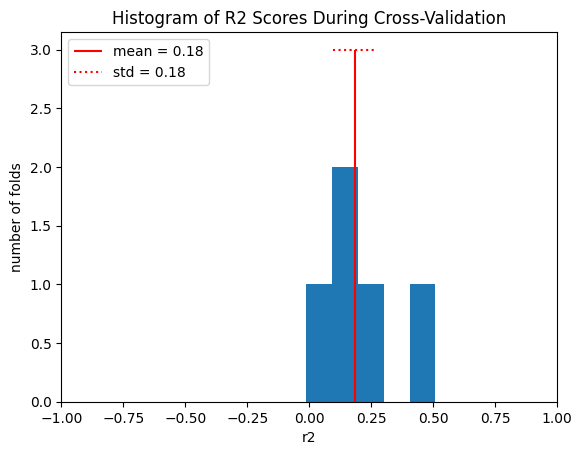

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor()

cv_results = cross_validate(tree, X, y, scoring = "r2", cv=5)

# Custom method
plot_histogram_cv_results(cv_results)